In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("jobs_in_data.csv")

In [56]:
data_selected = data[['salary_in_usd','work_year']]

In [58]:
le = LabelEncoder()
data['experience_level_encoded'] = le.fit_transform(data['experience_level'])
data_selected.loc[:,'experience_level_encoded'] = data['experience_level_encoded']

In [59]:
data_selected.head()

,salary_in_usd,work_year,experience_level_encoded
0,95012,2023,2
1,186000,2023,3
2,81800,2023,3
3,212000,2023,3
4,93300,2023,3


In [60]:
#Veri ölçeklendirme (-1,1 arasına aldık verileri)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

In [61]:
#K-Means Modeli
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
#GMM Modeli 
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)

In [63]:
#K-Means ve GMM kümelerini veri setine ekleme
data['kmeans_clusters'] = kmeans_clusters
data['gmm_clusters'] = gmm_clusters

In [64]:
#Veri Görselleştirme
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

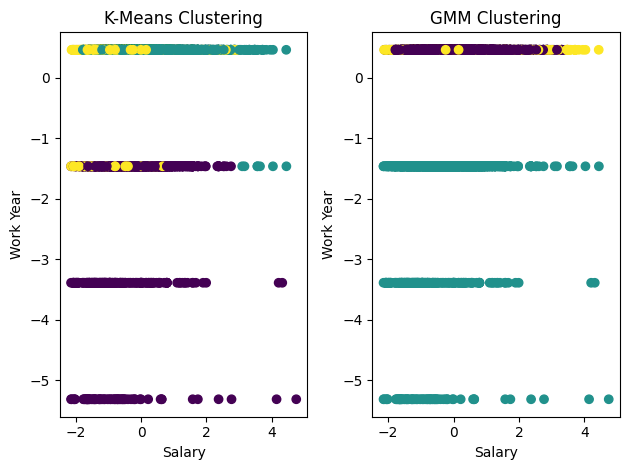

In [65]:
plt.subplot(1,2,1)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans_clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Salary")
plt.ylabel("Work Year")

plt.subplot(1,2,2)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=gmm_clusters, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("Salary")
plt.ylabel("Work Year")
plt.tight_layout()
plt.show()

In [66]:
print(data[['salary_in_usd', 'work_year', 'experience_level', 'kmeans_clusters', 'gmm_clusters']].head())

   salary_in_usd  work_year experience_level  kmeans_clusters  gmm_clusters
0          95012       2023        Mid-level                2             0
1         186000       2023           Senior                1             0
2          81800       2023           Senior                1             0
3         212000       2023           Senior                1             0
4          93300       2023           Senior                1             0


ValueError: y contains previously unseen labels: [-1]

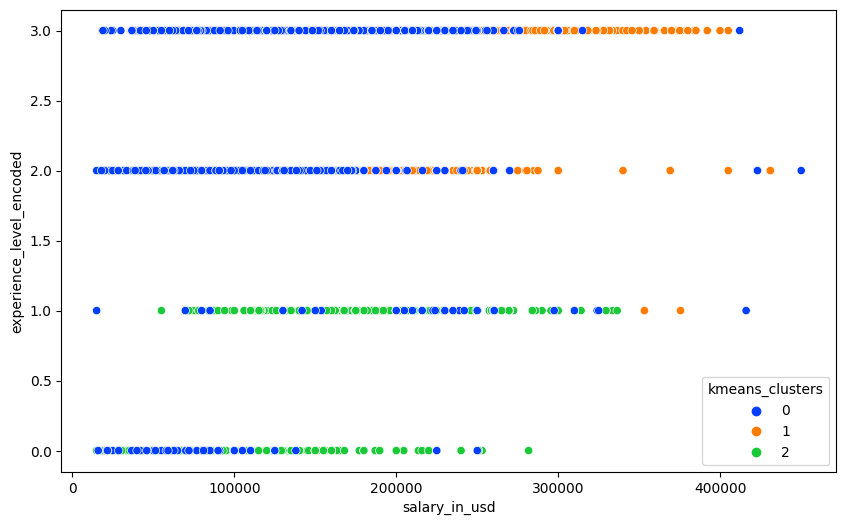

In [70]:
# Grafik oluşturma
plt.figure(figsize=(10, 6))

# Her kümeyi farklı bir renkle çizme
sns.scatterplot(x='salary_in_usd', y='experience_level_encoded', hue='kmeans_clusters', data=data, palette='bright')

# Küme merkezlerini çizme
centers = kmeans.cluster_centers_
centers[:, 1] = le.inverse_transform(centers[:, 1].astype(int))
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='*', edgecolors='white')

# Grafik başlığı ve eksen etiketleri ekleme
plt.title('K-Means Clustering')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level (Numeric)')

# Görseli göster
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


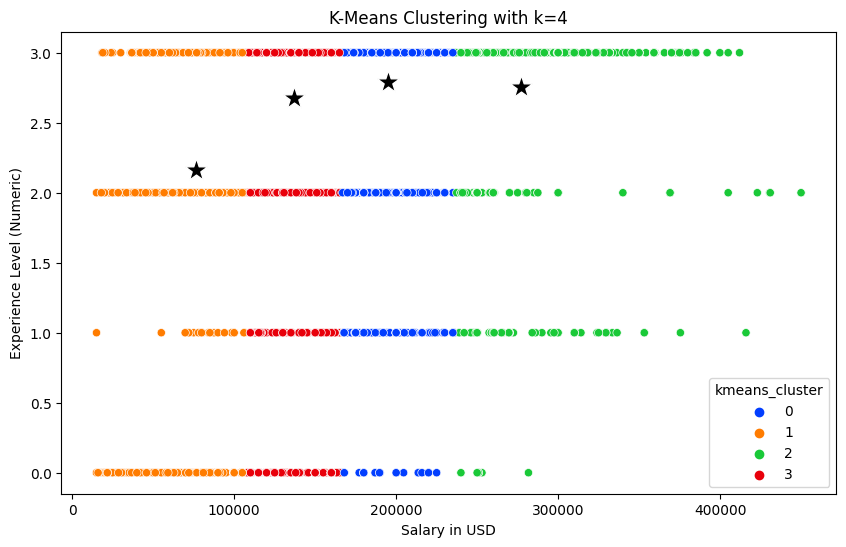

In [83]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Veri dosyasını yükleme
data = pd.read_csv('jobs_in_data.csv')

# Tecrübe seviyesini sayısal bir değere dönüştürme
le = LabelEncoder()
data['experience_level_numeric'] = le.fit_transform(data['experience_level'])

# KMeans modelini k = 4 kullanarak uygulama
kmeans = KMeans(n_clusters=4, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data[['salary_in_usd', 'experience_level_numeric']])

# Grafik oluşturma
plt.figure(figsize=(10, 6))

# Her kümeyi farklı bir renkle çizme
sns.scatterplot(x='salary_in_usd', y='experience_level_numeric', hue='kmeans_cluster', data=data, palette='bright')

# Küme merkezlerini çizme
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='*', edgecolors='white')

# Grafik başlığı ve eksen etiketleri ekleme
plt.title('K-Means Clustering with k=4')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level (Numeric)')

# Görseli göster
plt.show()


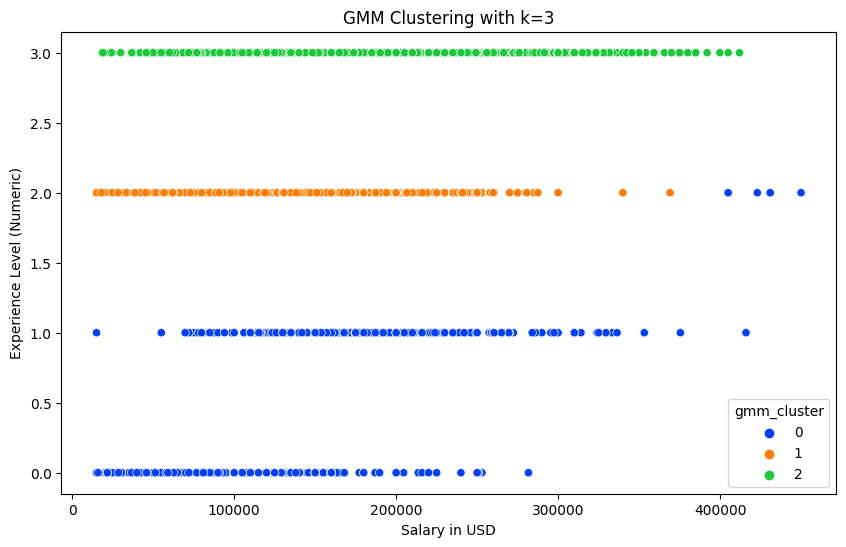

In [82]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Veri dosyasını yükleme
data = pd.read_csv('jobs_in_data.csv')

# Tecrübe seviyesini sayısal bir değere dönüştürme
le = LabelEncoder()
data['experience_level_numeric'] = le.fit_transform(data['experience_level'])

# KMeans modelini k = 3 kullanarak uygulama
gmm = GaussianMixture(n_components=3, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data[['salary_in_usd', 'experience_level_numeric']])

# Grafik oluşturma
plt.figure(figsize=(10, 6))

# Her kümeyi farklı bir renkle çizme
sns.scatterplot(x='salary_in_usd', y='experience_level_numeric', hue='gmm_cluster', data=data, palette='bright')


# Grafik başlığı ve eksen etiketleri ekleme
plt.title('GMM Clustering with k=3')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level (Numeric)')

# Görseli göster
plt.show()